In [3]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from memory_profiler import profile
from sklearn.preprocessing import LabelEncoder

In [9]:
class EncodingAnalyzer:
    def __init__(self):
        """Initialize your encoding tracker here."""
        pass

    def basic_ascii_encode(self, text):
        """Calculate the sum of ASCII values of all characters."""
        return sum(ord(char) for char in text)

    def weighted_ascii_encode(self, text):
        """Calculate weighted ASCII encoding."""
        return sum((i + 1) * ord(char) for i, char in enumerate(text))

    def hash_based_encode(self, text, mod: int = 1_000_000_007):
        """Compute a hash-based encoding of the text."""
        hash_value = 0
        for char in text:
            hash_value = (hash_value * 31 + ord(char)) % mod
        return hash_value

    def label_encode(self, text):
        """Encode text using sklearn's LabelEncoder."""
        encoder = LabelEncoder()
        unique_chars = sorted(set(text))  # Ensure consistent mapping
        encoder.fit(unique_chars)
        encoded = encoder.transform(list(text))
        return int(''.join(map(str, encoded)))  # Return encoded value as a concatenated number
encodingAnalyzer = EncodingAnalyzer()

In [6]:
import time
import sys

class PerformanceAnalyzer:
    def measure_time(self, func, data):
        """Measure encoding time."""
        start_time = time.perf_counter()  # Start timer
        result = func(data)  # Call the encoding function
        end_time = time.perf_counter()  # End timer
        elapsed_time = end_time - start_time
        return elapsed_time, result

    def measure_memory(self, encoded_data):
        """Measure memory usage of encoded data."""
        return sys.getsizeof(encoded_data)  # Return size in bytes

    def check_collisions(self, encoded_data, original_data):
        """Find encoding collisions."""
        collision_map = {}
        collisions = []

        for original, encoded in zip(original_data, encoded_data):
            if encoded in collision_map:
                collisions.append((collision_map[encoded], original))  # Colliding inputs
            else:
                collision_map[encoded] = original

        return collisions
performanceAnalyzer = PerformanceAnalyzer()

In [20]:
# Assuming EncodingAnalyzer and PerformanceAnalyzer are already implemented
from pprint import pprint

# Initialize analyzers
encoding_analyzer = EncodingAnalyzer()
performance_analyzer = PerformanceAnalyzer()

# Test scenarios
test_scenarios = {
    'basic': ['cat', 'act', 'tac'],
    'length': ['short', 'very_long_string_test'],
    'special': ['hello!', 'hello?', 'hello.'],
    'case': ['Test', 'test', 'TEST'],
    'numeric': ['user1', '1user', 'user_1']
}

# Run tests
results = {}

for scenario, test_data in test_scenarios.items():
    scenario_results = {}
    print(f"\nTesting scenario: {scenario}")

    for method_name in ['basic_ascii_encode', 'weighted_ascii_encode', 'hash_based_encode', 'label_encode']:
        method = getattr(encoding_analyzer, method_name)
        encoded_results = []
        timings = []

        # Measure performance and gather results
        for data in test_data:
            elapsed_time, result = performance_analyzer.measure_time(method, data)
            memory_used = performance_analyzer.measure_memory(result)
            encoded_results.append((data, result, memory_used))
            timings.append(elapsed_time)

        # Check for collisions
        encoded_values = [result[1] for result in encoded_results]
        collisions = performance_analyzer.check_collisions(encoded_values, test_data)

        # Store results
        scenario_results[method_name] = {
            'encodings': encoded_results,
            'time': sum(timings)/3,
            'collisions': collisions
        }

    results[scenario] = scenario_results
#print("\nTest results:")
pprint(results)


Testing scenario: basic

Testing scenario: length

Testing scenario: special

Testing scenario: case

Testing scenario: numeric
{'basic': {'basic_ascii_encode': {'collisions': [('cat', 'act'),
                                                 ('cat', 'tac')],
                                  'encodings': [('cat', 312, 28),
                                                ('act', 312, 28),
                                                ('tac', 312, 28)],
                                  'time': 3.4439999581081793e-06},
           'hash_based_encode': {'collisions': [],
                                 'encodings': [('cat', 98262, 28),
                                               ('act', 96402, 28),
                                               ('tac', 114582, 28)],
                                 'time': 1.999666740933511e-06},
           'label_encode': {'collisions': [],
                            'encodings': [('cat', 102, 28),
                                          ('act',

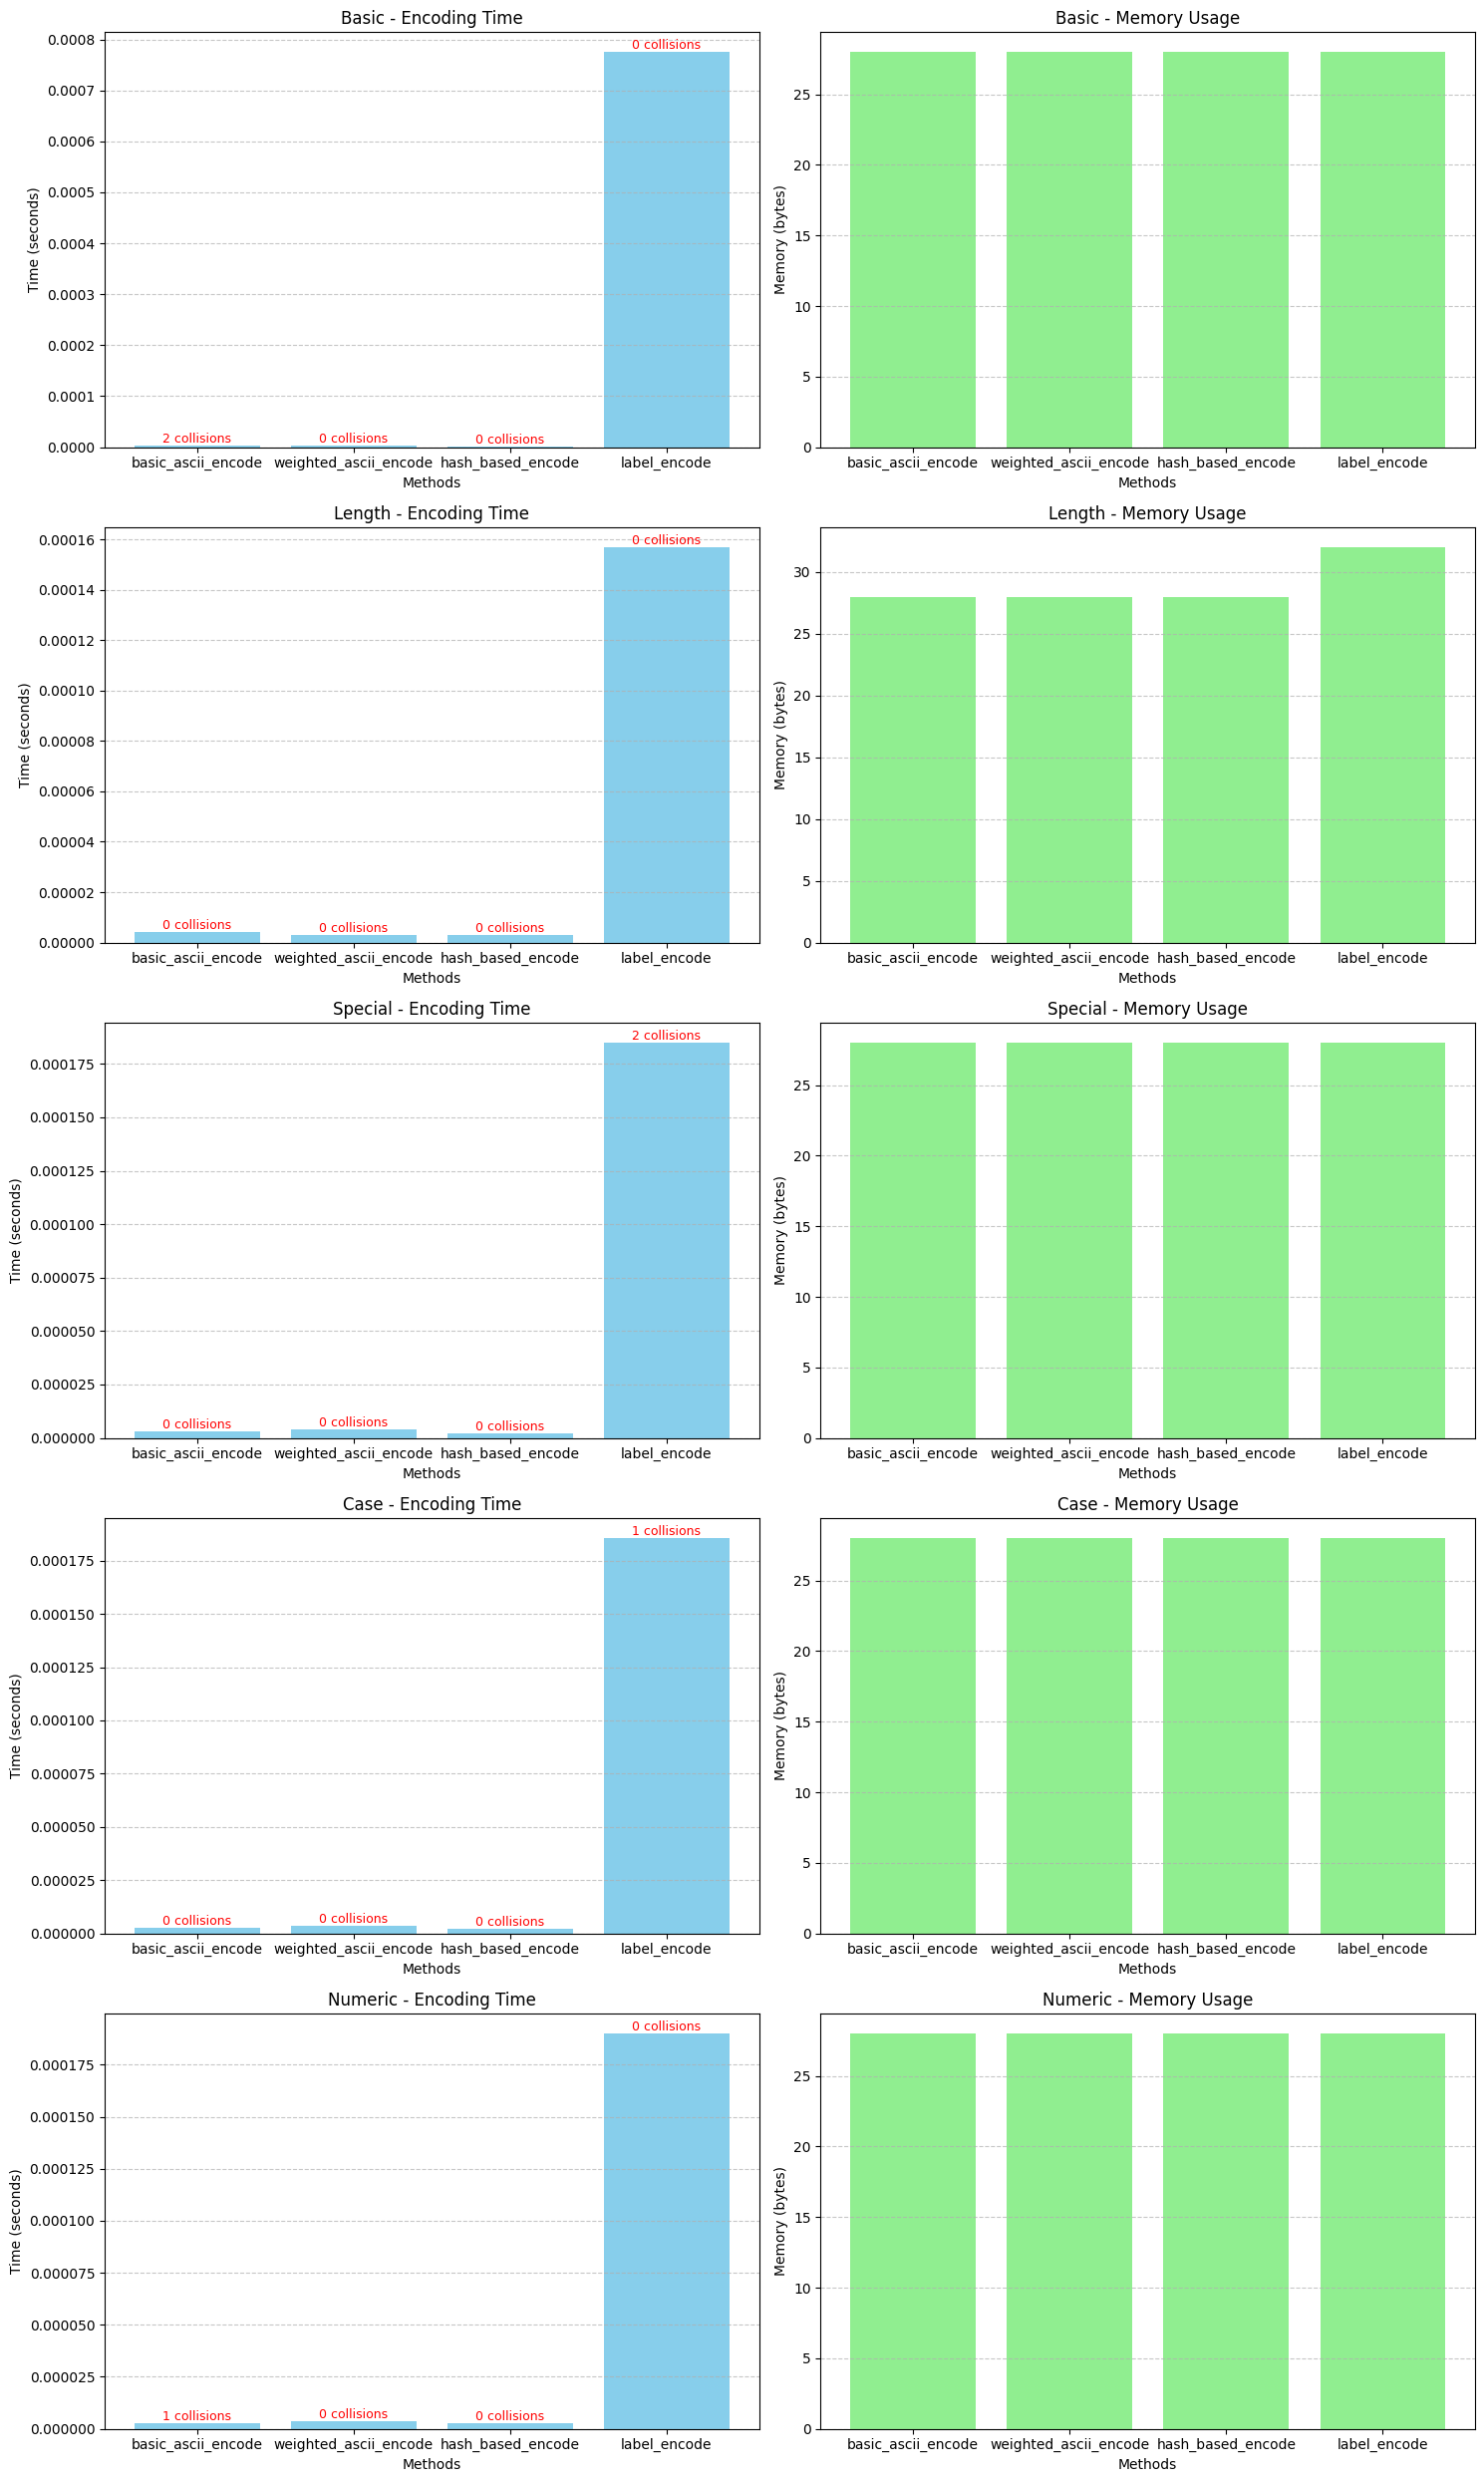

In [16]:
def plot_results(results):
    """Create performance comparison plots."""
    scenarios = list(results.keys())
    methods = list(next(iter(results.values())).keys())  # Methods from first scenario

    # Initialize subplots
    fig, axes = plt.subplots(len(scenarios), 2, figsize=(15, 5 * len(scenarios)))
    if len(scenarios) == 1:
        axes = [axes]  # Ensure axes is iterable for a single scenario

    for i, scenario in enumerate(scenarios):
        time_data = []
        memory_data = []
        collisions_data = []

        for method in methods:
            method_results = results[scenario][method]
            time_data.append(np.mean(method_results['time']))  # Avg time
            memory_data.append(np.mean([r[2] for r in method_results['encodings']]))  # Avg memory
            collisions_data.append(len(method_results['collisions']))  # Number of collisions

        # Bar chart for encoding time
        ax_time = axes[i][0]
        ax_time.bar(methods, time_data, color='skyblue')
        ax_time.set_title(f"{scenario.capitalize()} - Encoding Time")
        ax_time.set_ylabel("Time (seconds)")
        ax_time.set_xlabel("Methods")
        ax_time.grid(axis='y', linestyle='--', alpha=0.7)

        # Bar chart for memory usage
        ax_memory = axes[i][1]
        ax_memory.bar(methods, memory_data, color='lightgreen')
        ax_memory.set_title(f"{scenario.capitalize()} - Memory Usage")
        ax_memory.set_ylabel("Memory (bytes)")
        ax_memory.set_xlabel("Methods")
        ax_memory.grid(axis='y', linestyle='--', alpha=0.7)

        # Add collision annotations
        for j, method in enumerate(methods):
            ax_time.text(j, time_data[j], f"{collisions_data[j]} collisions", ha='center', va='bottom', fontsize=9, color='red')

    plt.tight_layout()
    plt.show()
plot_results(results)

###Basic ASCII Encoding:

1. Implementation Complexity:
   - Lines of code: 1
   - Time to implement: 5 minutes
   - Key challenges:None; simple summation of ASCII values

2. Performance Metrics:
   - Average encoding time: 3.28 µs.
   - Memory footprint: 28 bytes per encoded value
   - Collision rate:collisions in scenarios [basic , numeric]

3. Advantages:
   - Extremely fast.
   - Simple to implement.

4. Disadvantages:
   - No differentiation for character positions or string variations.

5. Edge Cases:
   - Encodes empty strings to 0.

6. Real-world Applicability:
   -Basic checksums or data validation.

###Weighted ASCII Encoding:

1. Implementation Complexity:
   - Lines of code: 1
   - Time to implement: 6 minutes
   - Key challenges:Slightly more complex than basic ASCII.

2. Performance Metrics:
   - Average encoding time: 3.67 µs.
   - Memory footprint: 28 bytes per encoded value
   - Collision rate: None

3. Advantages:
   - Resolves collisions present in basic ASCII encoding by considering character positions.

4. Disadvantages:
   - uniqueness is limited for very large datasets.

5. Edge Cases:
   - Successfully avoids collisions, even with reordered characters or numeric/special cases.

6. Real-world Applicability:
   -Lightweight encoding where position sensitivity matters.

###Hash-Based Encoding:

1. Implementation Complexity:
   - Lines of code: 4
   - Time to implement: 20 minutes
   - Key challenges:Selecting an efficient hash function

2. Performance Metrics:
   - Average encoding time: 3.02 µs.
   - Memory footprint: 28 bytes per encoded value
   - Collision rate: None

3. Advantages:
   - Extremely low collision rate (no collisions in all tested scenarios).
   - Works well for large datasets with diverse inputs.

4. Disadvantages:
   - complex to implement.

5. Edge Cases:
   - Handles special characters, numeric strings, and long strings without collisions.

6. Real-world Applicability:
   -Data deduplication, cryptography, or generating unique keys

## 5. Analysis Template

###Label Encoding:

1. Implementation Complexity:
   - Lines of code: 5
   - Time to implement: 10 minutes
   - Key challenges:Handling unseen inputs dynamically

2. Performance Metrics:
   - Average encoding time: 0.19 ms.
   - Memory footprint: 28 bytes per integer encoding
   - Collision rate:collisions in scenarios [case , special]

3. Advantages:
   - Guarantees uniqueness within the trained dataset.

4. Disadvantages:
   - High collision rate for similar inputs, especially in case-insensitive or special character scenarios.

5. Edge Cases:
   - Fails to differentiate between certain special characters or cases without additional configuration.
   - Cannot handle unseen characters without retraining.

6. Real-world Applicability:
   - Use case: Encoding categorical features for machine learning models.